_Test these functions by creating a separate jupyter notebook, importing your acquire module, and calling the functions in it._

In [2]:
from acquire_zillow import save_df

save_df()

In [75]:
from acquire_mall import get_mall_data
df = get_mall_data()

In [76]:
df.head(10)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [1]:
%matplotlib inline

In [77]:
df = df.set_index('customer_id')
df.head(10)

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


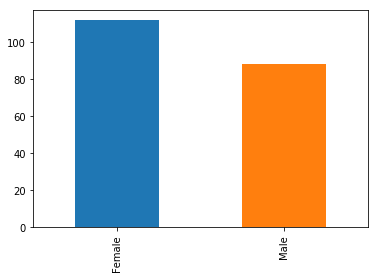

In [6]:
df.gender.value_counts().plot.bar()

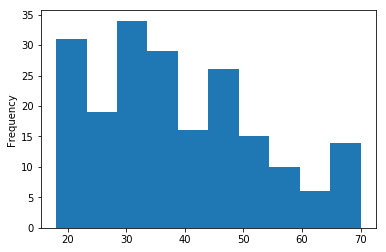

In [7]:
df.age.plot.hist()

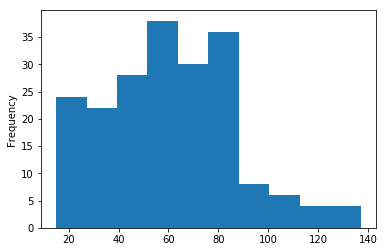

In [8]:
df.annual_income.plot.hist()

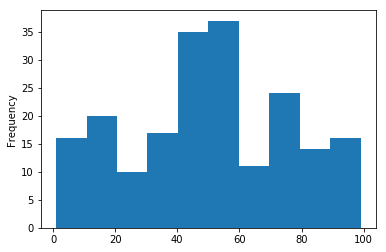

In [9]:
df.spending_score.plot.hist()

In [78]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

get_upper_outliers(df['annual_income'], 1.5)

customer_id
1      0.00
2      0.00
3      0.00
4      0.00
5      0.00
6      0.00
7      0.00
8      0.00
9      0.00
10     0.00
11     0.00
12     0.00
13     0.00
14     0.00
15     0.00
16     0.00
17     0.00
18     0.00
19     0.00
20     0.00
21     0.00
22     0.00
23     0.00
24     0.00
25     0.00
26     0.00
27     0.00
28     0.00
29     0.00
30     0.00
       ... 
171    0.00
172    0.00
173    0.00
174    0.00
175    0.00
176    0.00
177    0.00
178    0.00
179    0.00
180    0.00
181    0.00
182    0.00
183    0.00
184    0.00
185    0.00
186    0.00
187    0.00
188    0.00
189    0.00
190    0.00
191    0.00
192    0.00
193    0.00
194    0.00
195    0.00
196    0.00
197    0.00
198    0.00
199    4.25
200    4.25
Name: annual_income, Length: 200, dtype: float64

In [79]:
df.head(10)

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [80]:
from sklearn.preprocessing import LabelEncoder

# Encode the gender using a sklearn label encoder.
encoder = LabelEncoder()
encoder.fit(df.gender)
df['gender_id'] = encoder.transform(df.gender)
df.gender_id

customer_id
1      1
2      1
3      0
4      0
5      0
6      0
7      0
8      0
9      1
10     0
11     1
12     0
13     0
14     0
15     1
16     1
17     0
18     1
19     1
20     0
21     1
22     1
23     0
24     1
25     0
26     1
27     0
28     1
29     0
30     0
      ..
171    1
172    1
173    1
174    1
175    0
176    0
177    1
178    1
179    1
180    1
181    0
182    0
183    1
184    0
185    0
186    1
187    0
188    1
189    0
190    0
191    0
192    0
193    1
194    0
195    0
196    0
197    0
198    1
199    1
200    1
Name: gender_id, Length: 200, dtype: int64

In [72]:
df.head(10)

,gender,age,annual_income,spending_score,gender_id
customer_id,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0
6,Female,22,17,76,0
7,Female,35,18,6,0
8,Female,23,18,94,0
9,Male,64,19,3,1


In [14]:
from summarize import summarize_data

In [81]:
summarize_data(df)

HEAD
             gender  age  annual_income  spending_score  gender_id
customer_id                                                       
1              Male   19             15              39          1
2              Male   21             15              81          1
3            Female   20             16               6          0
4            Female   23             16              77          0
5            Female   31             17              40          0

TAIL
             gender  age  annual_income  spending_score  gender_id
customer_id                                                       
196          Female   35            120              79          0
197          Female   45            126              28          0
198            Male   32            126              74          1
199            Male   32            137              18          1
200            Male   30            137              83          1

SHAPE: (200, 5)

DESCRIPTION
              age  an

In [82]:
import pandas as pd

def join_zillow_data():
    # The FOUR HORSEMEN of the Apocalypse
    prop6_df = pd.read_csv('properties_2016.csv', low_memory=False)
    prop7_df = pd.read_csv('properties_2017.csv', low_memory=False)
    pred6_df = pd.read_csv('predictions_2016.csv', low_memory=False)
    pred7_df = pd.read_csv('predictions_2017.csv', low_memory=False)

    # Join predictions and properties together
    df6 = pd.merge(pred6_df, prop6_df, on='parcelid', how='inner')
    df7 = pd.merge(pred7_df, prop7_df, on='parcelid', how='inner')

    # Join 2016 and 2017 data together
    df = pd.concat([df6, df7])

    return df

df = join_zillow_data()

In [83]:
df.head(10)

,parcelid,logerror,transactiondate,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc
0,11016594,0.0276,2016-01-01,2931667,1.0,NaN,NaN,2.0,3.0,NaN,...,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13,Central,NaN,NaN,Central
1,14366692,-0.1684,2016-01-01,475764,NaN,NaN,NaN,3.5,4.0,NaN,...,2015.0,239071.0,10153.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,2444575,1.0,NaN,NaN,3.0,2.0,NaN,...,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13,Central,NaN,NaN,Central
3,12643413,0.0218,2016-01-02,1584730,1.0,NaN,NaN,2.0,2.0,NaN,...,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13,Central,NaN,NaN,Central
4,14432541,-0.0050,2016-01-02,2926916,NaN,NaN,NaN,2.5,4.0,NaN,...,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13,NaN,NaN,NaN,NaN
5,11509835,-0.2705,2016-01-02,2843942,1.0,NaN,NaN,4.0,4.0,NaN,...,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13,Central,NaN,NaN,Central
6,12286022,0.0440,2016-01-02,1628001,NaN,NaN,NaN,1.0,2.0,NaN,...,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13,NaN,NaN,NaN,Floor/Wall
7,17177301,0.1638,2016-01-02,2543293,NaN,NaN,NaN,2.5,3.0,NaN,...,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13,NaN,NaN,NaN,NaN
8,14739064,-0.0030,2016-01-02,519006,NaN,NaN,NaN,1.0,2.0,NaN,...,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13,NaN,NaN,NaN,NaN
9,14677559,0.0843,2016-01-03,1604540,NaN,NaN,NaN,2.0,2.0,NaN,...,2015.0,80983.0,1940.26,NaN,NaN,6.059063e+13,NaN,NaN,NaN,NaN


In [84]:
from summarize import summarize_data
summarize_data(df)

HEAD
   parcelid  logerror transactiondate       id  airconditioningtypeid  \
0  11016594    0.0276      2016-01-01  2931667                    1.0   
1  14366692   -0.1684      2016-01-01   475764                    NaN   
2  12098116   -0.0040      2016-01-01  2444575                    1.0   
3  12643413    0.0218      2016-01-02  1584730                    1.0   
4  14432541   -0.0050      2016-01-02  2926916                    NaN   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN          2.0         3.0   
1                       NaN           NaN          3.5         4.0   
2                       NaN           NaN          3.0         2.0   
3                       NaN           NaN          2.0         2.0   
4                       NaN           NaN          2.5         4.0   

   buildingclasstypeid         ...           assessmentyear  \
0                  NaN         ...                   2015.0   
1        

(10554760.42, 26409495.9]     167841
(26409495.9, 42107253.8]           0
(42107253.8, 57805011.7]           0
(57805011.7, 73502769.6]           0
(73502769.6, 89200527.5]           1
(89200527.5, 104898285.4]          4
(104898285.4, 120596043.3]         0
(120596043.3, 136293801.2]         0
(136293801.2, 151991559.1]         0
(151991559.1, 167689317.0]        42
Name: parcelid, dtype: int64


logerror:
(-4.666, -3.664]         6
(-3.664, -2.672]         4
(-2.672, -1.68]         83
(-1.68, -0.688]        364
(-0.688, 0.304]     163696
(0.304, 1.296]        3417
(1.296, 2.287]         197
(2.287, 3.279]         111
(3.279, 4.271]           6
(4.271, 5.263]           4
Name: logerror, dtype: int64


transactiondate:
2017-06-30    1195
2017-04-28     917
2016-07-29     910
2016-04-29     902
2016-09-30     894
2016-06-30     874
2017-05-31     868
2016-05-27     863
2017-07-28     815
2017-08-31     782
2017-03-31     772
2017-05-26     746
2016-08-31     737
2016-07-01     731
2017-

poolsizesum:
(22.273, 196.6]      15
(196.6, 369.2]      178
(369.2, 541.8]      979
(541.8, 714.4]      468
(714.4, 887.0]      167
(887.0, 1059.6]      20
(1059.6, 1232.2]      7
(1232.2, 1404.8]      1
(1404.8, 1577.4]      1
(1577.4, 1750.0]      2
Name: poolsizesum, dtype: int64


pooltypeid10:
1.0    1626
Name: pooltypeid10, dtype: int64


pooltypeid2:
1.0    2278
Name: pooltypeid2, dtype: int64


pooltypeid7:
1.0    31776
Name: pooltypeid7, dtype: int64


propertycountylandusecode:
0100    57628
122     28450
010C    19102
0101    13848
34      10878
1111     7245
1        5314
010E     4339
010D     4155
0200     4000
1129     3023
1110     2142
0400     1369
0300     1063
012C      908
0104      717
1128      691
01DC      463
01HC      285
010V      245
38        200
96        195
0103      191
010G      174
010H      136
010M      112
0700      104
0108      103
1117      102
1210       89
        ...  
0301        3
030G        3
0111        3
1120        3
1722        3
01

censustractandblock:
(59948352007016.984, 102636920499301.5]    167001
(102636920499301.5, 144902829897603.0]          0
(144902829897603.0, 187168739295904.5]          0
(187168739295904.5, 229434648694206.03]         0
(229434648694206.03, 271700558092507.5]         0
(271700558092507.5, 313966467490809.0]          0
(313966467490809.0, 356232376889110.5]          0
(356232376889110.5, 398498286287411.94]         0
(398498286287411.94, 440764195685713.5]         0
(440764195685713.5, 483030105084015.0]          1
Name: censustractandblock, dtype: int64


airconditioningdesc:
Central               49854
Yes                    3408
None                    382
Wall Unit               116
Refrigeration            27
Evaporative Cooler        1
Name: airconditioningdesc, dtype: int64


architecturalstyledesc:
Contemporary         394
Conventional          35
Bungalow              16
Ranch/Rambler         15
Cape Cod               7
French Provincial      1
Name: architecturalstyledesc, dt

In [87]:
def missing_values_col(df):
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    nan_value = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    return pd.DataFrame({'num_missing': null_count, 'percentage': null_percentage,
                         'num_empty': empty_count, 'nan_value': nan_value})

missing_values_col(df)

,num_missing,percentage,num_empty,nan_value
parcelid,0,0.000000,0,0
logerror,0,0.000000,0,0
transactiondate,0,0.000000,0,0
id,0,0.000000,0,0
airconditioningtypeid,114100,67.961975,0,0
architecturalstyletypeid,167420,99.721243,0,0
basementsqft,167795,99.944606,0,0
bathroomcnt,34,0.020252,0,0
bedroomcnt,34,0.020252,0,0
buildingclasstypeid,167857,99.981535,0,0


In [88]:
df

,parcelid,logerror,transactiondate,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc
0,11016594,0.027600,2016-01-01,2931667,1.0,NaN,NaN,2.0,3.0,NaN,...,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13,Central,NaN,NaN,Central
1,14366692,-0.168400,2016-01-01,475764,NaN,NaN,NaN,3.5,4.0,NaN,...,2015.0,239071.0,10153.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12098116,-0.004000,2016-01-01,2444575,1.0,NaN,NaN,3.0,2.0,NaN,...,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13,Central,NaN,NaN,Central
3,12643413,0.021800,2016-01-02,1584730,1.0,NaN,NaN,2.0,2.0,NaN,...,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13,Central,NaN,NaN,Central
4,14432541,-0.005000,2016-01-02,2926916,NaN,NaN,NaN,2.5,4.0,NaN,...,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13,NaN,NaN,NaN,NaN
5,11509835,-0.270500,2016-01-02,2843942,1.0,NaN,NaN,4.0,4.0,NaN,...,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13,Central,NaN,NaN,Central
6,12286022,0.044000,2016-01-02,1628001,NaN,NaN,NaN,1.0,2.0,NaN,...,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13,NaN,NaN,NaN,Floor/Wall
7,17177301,0.163800,2016-01-02,2543293,NaN,NaN,NaN,2.5,3.0,NaN,...,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13,NaN,NaN,NaN,NaN
8,14739064,-0.003000,2016-01-02,519006,NaN,NaN,NaN,1.0,2.0,NaN,...,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13,NaN,NaN,NaN,NaN
9,14677559,0.084300,2016-01-03,1604540,NaN,NaN,NaN,2.0,2.0,NaN,...,2015.0,80983.0,1940.26,NaN,NaN,6.059063e+13,NaN,NaN,NaN,NaN


In [89]:
def missing_values_row(df):
    null_count = df.isnull().sum(axis=1)
    null_percentage = (null_count / df.shape[1]) * 100
    return pd.DataFrame({'num_missing': null_count, 'percentage': null_percentage})

missing_values_row(df)

,num_missing,percentage
0,29,44.615385
1,35,53.846154
2,29,44.615385
3,29,44.615385
4,31,47.692308
5,30,46.153846
6,32,49.230769
7,31,47.692308
8,36,55.384615
9,35,53.846154


In [59]:
def fill_with_zeroes(df, *cols):
    for col in cols:
        df[col] = df[col].fillna(0)
    return df

fill_with_zeroes(df, 'airconditioningtypeid','architecturalstyletypeid', 'basementsqft' )
df

,parcelid,logerror,transactiondate,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc
0,11016594,0.027600,2016-01-01,2931667,1.0,nan,0.0,2.0,3.0,nan,...,2015.0,237416.0,6735.88,nan,NaN,6.037107e+13,Central,NaN,NaN,Central
1,14366692,-0.168400,2016-01-01,475764,nan,nan,0.0,3.5,4.0,nan,...,2015.0,239071.0,10153.02,nan,NaN,NaN,NaN,NaN,NaN,NaN
2,12098116,-0.004000,2016-01-01,2444575,1.0,nan,0.0,3.0,2.0,nan,...,2015.0,57912.0,11484.48,nan,NaN,6.037464e+13,Central,NaN,NaN,Central
3,12643413,0.021800,2016-01-02,1584730,1.0,nan,0.0,2.0,2.0,nan,...,2015.0,73362.0,3048.74,nan,NaN,6.037296e+13,Central,NaN,NaN,Central
4,14432541,-0.005000,2016-01-02,2926916,nan,nan,0.0,2.5,4.0,nan,...,2015.0,264977.0,5488.96,nan,NaN,6.059042e+13,NaN,NaN,NaN,NaN
5,11509835,-0.270500,2016-01-02,2843942,1.0,nan,0.0,4.0,4.0,nan,...,2015.0,1567301.0,27126.57,nan,NaN,6.037621e+13,Central,NaN,NaN,Central
6,12286022,0.044000,2016-01-02,1628001,nan,nan,0.0,1.0,2.0,nan,...,2015.0,46972.0,2304.97,nan,NaN,6.037542e+13,NaN,NaN,NaN,Floor/Wall
7,17177301,0.163800,2016-01-02,2543293,nan,nan,0.0,2.5,3.0,nan,...,2015.0,199000.0,3745.50,nan,NaN,6.111003e+13,NaN,NaN,NaN,NaN
8,14739064,-0.003000,2016-01-02,519006,nan,nan,0.0,1.0,2.0,nan,...,2015.0,143230.0,2172.88,nan,NaN,6.059042e+13,NaN,NaN,NaN,NaN
9,14677559,0.084300,2016-01-03,1604540,nan,nan,0.0,2.0,2.0,nan,...,2015.0,80983.0,1940.26,nan,NaN,6.059063e+13,NaN,NaN,NaN,NaN


In [33]:
df.loc[df['bathroomcnt'] >= 1].head(10)

,parcelid,logerror,transactiondate,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc
0,11016594,0.0276,2016-01-01,2931667,1.0,nan,NaN,2.0,3.0,nan,...,2015.0,237416.0,6735.88,nan,NaN,6.037107e+13,Central,NaN,NaN,Central
1,14366692,-0.1684,2016-01-01,475764,nan,nan,NaN,3.5,4.0,nan,...,2015.0,239071.0,10153.02,nan,NaN,NaN,NaN,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,2444575,1.0,nan,NaN,3.0,2.0,nan,...,2015.0,57912.0,11484.48,nan,NaN,6.037464e+13,Central,NaN,NaN,Central
3,12643413,0.0218,2016-01-02,1584730,1.0,nan,NaN,2.0,2.0,nan,...,2015.0,73362.0,3048.74,nan,NaN,6.037296e+13,Central,NaN,NaN,Central
4,14432541,-0.0050,2016-01-02,2926916,nan,nan,NaN,2.5,4.0,nan,...,2015.0,264977.0,5488.96,nan,NaN,6.059042e+13,NaN,NaN,NaN,NaN
5,11509835,-0.2705,2016-01-02,2843942,1.0,nan,NaN,4.0,4.0,nan,...,2015.0,1567301.0,27126.57,nan,NaN,6.037621e+13,Central,NaN,NaN,Central
6,12286022,0.0440,2016-01-02,1628001,nan,nan,NaN,1.0,2.0,nan,...,2015.0,46972.0,2304.97,nan,NaN,6.037542e+13,NaN,NaN,NaN,Floor/Wall
7,17177301,0.1638,2016-01-02,2543293,nan,nan,NaN,2.5,3.0,nan,...,2015.0,199000.0,3745.50,nan,NaN,6.111003e+13,NaN,NaN,NaN,NaN
8,14739064,-0.0030,2016-01-02,519006,nan,nan,NaN,1.0,2.0,nan,...,2015.0,143230.0,2172.88,nan,NaN,6.059042e+13,NaN,NaN,NaN,NaN
9,14677559,0.0843,2016-01-03,1604540,nan,nan,NaN,2.0,2.0,nan,...,2015.0,80983.0,1940.26,nan,NaN,6.059063e+13,NaN,NaN,NaN,NaN


In [35]:
df.latitude.isna().sum()

34

In [15]:
df['unitcnt'].value_counts(dropna=False)


 1.0      101916
NaN        58832
 2.0        4385
 4.0        1597
 3.0        1148
 6.0           2
 45.0          1
 11.0          1
 237.0         1
 42.0          1
 5.0           1
 9.0           1
 143.0         1
 70.0          1
Name: unitcnt, dtype: int64

In [10]:
df['bathroomcnt'].value_counts(dropna=False)


 2.0     68109
 3.0     37300
 1.0     27980
 2.5     14698
 4.0      7099
 1.5      3060
 5.0      2168
 3.5      2127
 0.0      1764
 4.5      1491
 6.0       867
 5.5       477
 7.0       269
 8.0       222
 6.5       101
 9.0        59
NaN         34
 7.5        25
 10.0       21
 11.0        6
 8.5         4
 12.0        3
 13.0        1
 20.0        1
 18.0        1
 15.0        1
Name: bathroomcnt, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 65 columns):
parcelid                        167888 non-null int64
logerror                        167888 non-null float64
transactiondate                 167888 non-null object
id                              167888 non-null int64
airconditioningtypeid           53788 non-null float64
architecturalstyletypeid        468 non-null float64
basementsqft                    93 non-null float64
bathroomcnt                     167854 non-null float64
bedroomcnt                      167854 non-null float64
buildingclasstypeid             31 non-null float64
buildingqualitytypeid           107173 non-null float64
calculatedbathnbr               166056 non-null float64
decktypeid                      1272 non-null float64
finishedfloor1squarefeet        12893 non-null float64
calculatedfinishedsquarefeet    166992 non-null float64
finishedsquarefeet12            159519 non-null float64
finishedsquare

In [31]:
def convert_to_string(df, *cols):
    for col in cols:
        df[col] = df[col].astype(str)
    return df

convert_to_string(df, 'id', 'airconditioningtypeid', 'architecturalstyletypeid', 'buildingclasstypeid',
                  'buildingqualitytypeid', 'decktypeid', 'fips', 'hashottuborspa', 'heatingorsystemtypeid',
                  'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertylandusetypeid', 'rawcensustractandblock',
                  'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'storytypeid',
                  'typeconstructiontypeid', 'fireplaceflag', 'taxdelinquencyflag' ).head(10)

,parcelid,logerror,transactiondate,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc
0,11016594,0.0276,2016-01-01,2931667,1.0,nan,NaN,2.0,3.0,nan,...,2015.0,237416.0,6735.88,nan,NaN,6.037107e+13,Central,NaN,NaN,Central
1,14366692,-0.1684,2016-01-01,475764,nan,nan,NaN,3.5,4.0,nan,...,2015.0,239071.0,10153.02,nan,NaN,NaN,NaN,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,2444575,1.0,nan,NaN,3.0,2.0,nan,...,2015.0,57912.0,11484.48,nan,NaN,6.037464e+13,Central,NaN,NaN,Central
3,12643413,0.0218,2016-01-02,1584730,1.0,nan,NaN,2.0,2.0,nan,...,2015.0,73362.0,3048.74,nan,NaN,6.037296e+13,Central,NaN,NaN,Central
4,14432541,-0.0050,2016-01-02,2926916,nan,nan,NaN,2.5,4.0,nan,...,2015.0,264977.0,5488.96,nan,NaN,6.059042e+13,NaN,NaN,NaN,NaN
5,11509835,-0.2705,2016-01-02,2843942,1.0,nan,NaN,4.0,4.0,nan,...,2015.0,1567301.0,27126.57,nan,NaN,6.037621e+13,Central,NaN,NaN,Central
6,12286022,0.0440,2016-01-02,1628001,nan,nan,NaN,1.0,2.0,nan,...,2015.0,46972.0,2304.97,nan,NaN,6.037542e+13,NaN,NaN,NaN,Floor/Wall
7,17177301,0.1638,2016-01-02,2543293,nan,nan,NaN,2.5,3.0,nan,...,2015.0,199000.0,3745.50,nan,NaN,6.111003e+13,NaN,NaN,NaN,NaN
8,14739064,-0.0030,2016-01-02,519006,nan,nan,NaN,1.0,2.0,nan,...,2015.0,143230.0,2172.88,nan,NaN,6.059042e+13,NaN,NaN,NaN,NaN
9,14677559,0.0843,2016-01-03,1604540,nan,nan,NaN,2.0,2.0,nan,...,2015.0,80983.0,1940.26,nan,NaN,6.059063e+13,NaN,NaN,NaN,NaN


In [60]:
df.head()

,parcelid,logerror,transactiondate,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc
0,11016594,0.0276,2016-01-01,2931667,1.0,nan,0.0,2.0,3.0,nan,...,2015.0,237416.0,6735.88,nan,NaN,6.037107e+13,Central,NaN,NaN,Central
1,14366692,-0.1684,2016-01-01,475764,nan,nan,0.0,3.5,4.0,nan,...,2015.0,239071.0,10153.02,nan,NaN,NaN,NaN,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,2444575,1.0,nan,0.0,3.0,2.0,nan,...,2015.0,57912.0,11484.48,nan,NaN,6.037464e+13,Central,NaN,NaN,Central
3,12643413,0.0218,2016-01-02,1584730,1.0,nan,0.0,2.0,2.0,nan,...,2015.0,73362.0,3048.74,nan,NaN,6.037296e+13,Central,NaN,NaN,Central
4,14432541,-0.0050,2016-01-02,2926916,nan,nan,0.0,2.5,4.0,nan,...,2015.0,264977.0,5488.96,nan,NaN,6.059042e+13,NaN,NaN,NaN,NaN


In [62]:
missing_values_col(df)

,num_missing,percentage,num_empty
parcelid,0,0.000000,0
logerror,0,0.000000,0
transactiondate,0,0.000000,0
id,0,0.000000,0
airconditioningtypeid,0,0.000000,0
architecturalstyletypeid,0,0.000000,0
basementsqft,0,0.000000,0
bathroomcnt,34,0.020252,0
bedroomcnt,34,0.020252,0
buildingclasstypeid,0,0.000000,0


In [63]:
df = df.drop['finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15',
				 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt',
				 'garagetotalsqft', 'threequarterbathnbr', 'yardbuildingsqft17', 'yardbuildingsqft26',
				 'numberofstories', 'taxdelinquencyyear', 'airconditioningdesc',
				 'architecturalstyledesc', 'buildingclassdesc']

TypeError: 'method' object is not subscriptable

In [66]:
df = df.drop(['finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15',
				 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt',
				 'garagetotalsqft', 'threequarterbathnbr', 'yardbuildingsqft17', 'yardbuildingsqft26',
				 'numberofstories', 'taxdelinquencyyear', 'airconditioningdesc',
				 'architecturalstyledesc', 'buildingclassdesc'], axis=1)

In [67]:
df

,parcelid,logerror,transactiondate,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,yearbuilt,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock,heatingorsystemdesc
0,11016594,0.027600,2016-01-01,2931667,1.0,nan,0.0,2.0,3.0,nan,...,1959.0,nan,122754.0,360170.0,2015.0,237416.0,6735.88,nan,6.037107e+13,Central
1,14366692,-0.168400,2016-01-01,475764,nan,nan,0.0,3.5,4.0,nan,...,2014.0,nan,346458.0,585529.0,2015.0,239071.0,10153.02,nan,NaN,NaN
2,12098116,-0.004000,2016-01-01,2444575,1.0,nan,0.0,3.0,2.0,nan,...,1940.0,nan,61994.0,119906.0,2015.0,57912.0,11484.48,nan,6.037464e+13,Central
3,12643413,0.021800,2016-01-02,1584730,1.0,nan,0.0,2.0,2.0,nan,...,1987.0,nan,171518.0,244880.0,2015.0,73362.0,3048.74,nan,6.037296e+13,Central
4,14432541,-0.005000,2016-01-02,2926916,nan,nan,0.0,2.5,4.0,nan,...,1981.0,nan,169574.0,434551.0,2015.0,264977.0,5488.96,nan,6.059042e+13,NaN
5,11509835,-0.270500,2016-01-02,2843942,1.0,nan,0.0,4.0,4.0,nan,...,1982.0,nan,880650.0,2447951.0,2015.0,1567301.0,27126.57,nan,6.037621e+13,Central
6,12286022,0.044000,2016-01-02,1628001,nan,nan,0.0,1.0,2.0,nan,...,1939.0,nan,64549.0,111521.0,2015.0,46972.0,2304.97,nan,6.037542e+13,Floor/Wall
7,17177301,0.163800,2016-01-02,2543293,nan,nan,0.0,2.5,3.0,nan,...,1994.0,nan,107000.0,306000.0,2015.0,199000.0,3745.50,nan,6.111003e+13,NaN
8,14739064,-0.003000,2016-01-02,519006,nan,nan,0.0,1.0,2.0,nan,...,1984.0,nan,66834.0,210064.0,2015.0,143230.0,2172.88,nan,6.059042e+13,NaN
9,14677559,0.084300,2016-01-03,1604540,nan,nan,0.0,2.0,2.0,nan,...,1977.0,nan,109977.0,190960.0,2015.0,80983.0,1940.26,nan,6.059063e+13,NaN


In [90]:
df.shape

(167888, 65)

In [92]:
df = df.loc[df['unitcnt'] == 1]

In [93]:
df.shape

(101916, 65)

In [100]:
df.shape

(101916, 65)

In [99]:
def missing_values_row(df):
    '''
    Write or use a previously written function to return the
    total missing values and the percent missing values by row.
    '''
    null_count = df.isnull().sum(axis=1)
    null_percentage = (null_count / df.shape[1]) * 100
    return pd.DataFrame({'num_missing': null_count, 'percentage': null_percentage})

missing_values_row(df)
# cutoff: rows that have 75% or more null values will be removed
# no rows were removed during this step

,num_missing,percentage
0,29,44.615385
2,29,44.615385
3,29,44.615385
5,30,46.153846
6,32,49.230769
10,31,47.692308
11,29,44.615385
12,32,49.230769
17,29,44.615385
19,29,44.615385


In [ ]:
df.loc[(df['latitude'] != A) & (df['column_name'] <= B)]
df.drop(df[df['latitude'] == 25].index, inplace = True) 